Worked with Angelo Iannielli - s317887


In [110]:
from itertools import product
import numpy as np
from scipy import sparse
from random import random, choice, randint, seed
from functools import reduce
from copy import copy
import math
import matplotlib.pyplot as plt

In [111]:
num_points = [100, 1_000, 5_000]
num_sets = num_points
density = [0.3, 0.7]

In [112]:
points = num_points[2]
sets = num_sets[2]
den = density[0]
iterations = 1000

In [113]:
def make_set_covering_problem(num_points, num_sets, density):
    """Returns a sparse array where rows are sets and columns are the covered items"""
    seed(num_points * 2654435761 + num_sets + density)
    sets = sparse.lil_array((num_sets, num_points), dtype=bool)
    for s, p in product(range(num_sets), range(num_points)):
        if random() < density:
            sets[s, p] = True
    for p in range(num_points):
        sets[randint(0, num_sets - 1), p] = True
    return sets

# Halloween Challenge

Find the best solution with the fewest calls to the fitness functions for:

- `num_points = [100, 1_000, 5_000]`
- `num_sets = num_points`
- `density = [.3, .7]`


In [114]:
SETS = make_set_covering_problem(points, sets, den)

# Hill-Climbing


In [115]:
# Taken from Giovanni Squillero's notebook on Github
def evaluate(state):
    cost = sum(state)
    valid = np.all(
        reduce(
            np.logical_or,
            [SETS.getrow(i).toarray().flatten() for i, t in enumerate(state) if t],
            np.array([False for _ in range(points)]),
        )
    )
    return valid, -cost if valid else 0

In [116]:
def tweak(state):
    new_state = copy(state)
    index = randint(0, sets - 1)
    new_state[index] = not new_state[index]

    return new_state

Step: 0 Current state: (False, 0)
Step: 1 Current state: (False, 0)
Step: 2 Current state: (False, 0)
Step: 3 Current state: (False, 0)
Step: 4 Current state: (False, 0)
Step: 5 Current state: (False, 0)
Step: 6 Current state: (False, 0)
Step: 7 Current state: (False, 0)
Step: 8 Current state: (False, 0)
Step: 9 Current state: (False, 0)
Step: 10 Current state: (False, 0)
Step: 11 Current state: (False, 0)
Step: 12 Current state: (False, 0)
Step: 13 Current state: (False, 0)
Step: 14 Current state: (False, 0)
Step: 15 Current state: (False, 0)
Step: 16 Current state: (False, 0)
Step: 17 Current state: (False, 0)
Step: 18 Current state: (False, 0)
Step: 19 Current state: (False, 0)
Step: 20 Current state: (False, 0)
Step: 21 Current state: (False, 0)
Step: 22 Current state: (False, 0)
Step: 23 Current state: (True, -24)
Step: 118 Current state: (True, -23)
Final state: (True, -23)


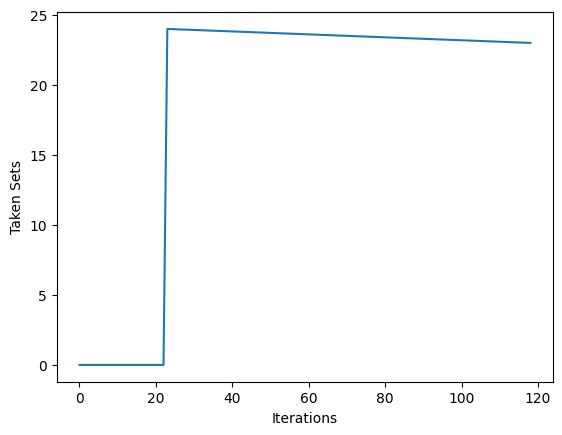

In [117]:
#current_state = [choice([True, False]) for _ in range(sets)]
current_state = [choice([False]) for _ in range(sets)]
taken_sets = []

iteration_sets = []
for step in range(iterations):
    new_state = tweak(current_state)
    if evaluate(new_state) >= evaluate(current_state):
        current_state = new_state
        # print(current_state, evaluate(current_state))
        taken_sets.append(-evaluate(current_state)[1])
        iteration_sets.append(step)
        print("Step: " + str(step) + " Current state: " + str(evaluate(current_state)))

print("Final state:", evaluate(current_state))

plt.plot(iteration_sets, taken_sets)
plt.xlabel("Iterations")
plt.ylabel("Taken Sets")
plt.show()

# Simulated Annealing


In [118]:
def acceptance_probability(current_solution, tweaked_solution, temp):
    x = -abs(current_solution[1] - tweaked_solution[1]) / temp
    return math.exp(x)

Step: 0 Current state: (False, 0)
Step: 1 Current state: (False, 0)
Step: 2 Current state: (False, 0)


Step: 3 Current state: (False, 0)
Step: 4 Current state: (False, 0)
Step: 5 Current state: (False, 0)
Step: 6 Current state: (False, 0)
Step: 7 Current state: (False, 0)
Step: 8 Current state: (False, 0)
Step: 9 Current state: (False, 0)
Step: 10 Current state: (False, 0)
Step: 11 Current state: (False, 0)
Step: 12 Current state: (False, 0)
Step: 13 Current state: (False, 0)
Step: 14 Current state: (False, 0)
Step: 15 Current state: (False, 0)
Step: 16 Current state: (False, 0)
Step: 17 Current state: (False, 0)
Step: 18 Current state: (False, 0)
Step: 19 Current state: (False, 0)
Step: 20 Current state: (False, 0)
Step: 21 Current state: (True, -20)
Step: 22 Current state: (True, -21)
Step: 23 Current state: (True, -22)
Step: 24 Current state: (True, -23)
Step: 25 Current state: (True, -24)
Step: 26 Current state: (True, -25)
Step: 27 Current state: (True, -26)
Step: 28 Current state: (True, -27)
Step: 31 Current state: (True, -28)
Step: 32 Current state: (True, -29)
Step: 33 Current 

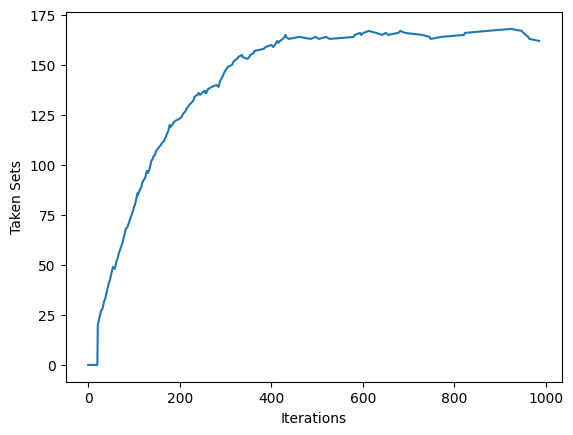

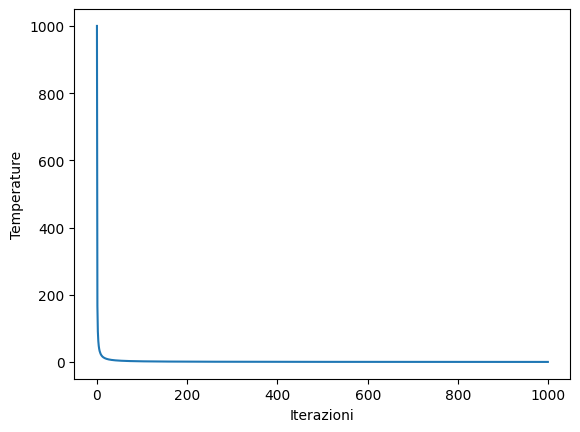

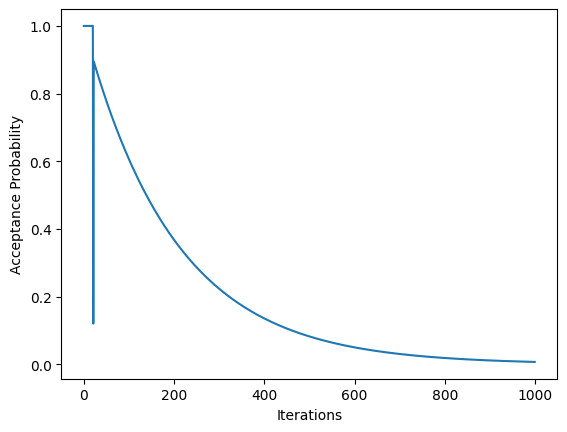

In [119]:
#current_state = [choice([True, False]) for _ in range(sets)]
current_state = [choice([False]) for _ in range(sets)]

temp_array = []
probability_array = []
taken_sets = []
iteration_sets = []

for step in range(iterations):
    new_state = tweak(current_state)
    temp = iterations / (5 * step + 1)
    temp_array.append(temp)
    p = acceptance_probability(evaluate(current_state), evaluate(new_state), temp)
    probability_array.append(p)

    if evaluate(new_state) >= evaluate(current_state) or random() < p:
        current_state = new_state
        # print(current_state, evaluate(current_state))
        taken_sets.append(-evaluate(current_state)[1])
        iteration_sets.append(step)
        print("Step: " + str(step) + " Current state: " + str(evaluate(current_state)))

print("Final state:", evaluate(current_state))

plt.plot(iteration_sets, taken_sets)
plt.xlabel("Iterations")
plt.ylabel("Taken Sets")
plt.show()

plt.plot(range(iterations), temp_array)
plt.xlabel("Iterazioni")
plt.ylabel("Temperature")
plt.show()

plt.plot(range(iterations), probability_array)
plt.xlabel("Iterations")
plt.ylabel("Acceptance Probability")
plt.show()

# Tabu Search


In [120]:


temperature = 1000
cooling_rate = 0.8
taboo_list = []
temp_array = []
iteration_sets = []
probability_array = []

In [121]:
def find_greatest_set(x):
    return x.sum(axis=1).argmax()


def evaluate_2(state):
    cost = sum(state)

    elem_covered = reduce(
        np.logical_or,
        [SETS.getrow(i).toarray() for i, t in enumerate(state) if t],
        np.array([False for _ in range(points)]),
    )

    valid = np.all(elem_covered)

    num_elem_covered = np.count_nonzero(elem_covered)

    return valid, num_elem_covered, -cost


def tweak_2(state):
    new_state = copy(state)

    while new_state in taboo_list:
        index = randint(0, sets - 1)
        new_state[index] = not new_state[index]

    taboo_list.append(new_state)
    return new_state

In [122]:
## Initialize the taboo list
taboo_list.clear()

## Find the set that cover the most num of elements and use it as starting point
current_solution = [False] * sets
current_solution[find_greatest_set(SETS)] = True
current_cost = evaluate_2(current_solution)

# Memorize that as the best solution for the moment
best_solution = [True] * sets
best_cost = (True, points, -sets)

# Insert the starting point into taboo list
taboo_list.append(current_solution)


In [123]:
for step in range(iterations):
    # Find a new possible solution
    new_state = tweak_2(current_solution)
    # print(new_state)

    # Evaluate the cost
    new_cost = evaluate_2(new_state)
    print(new_cost)

    # Calculate deltaE using the number of taken elements
    deltaE = - ( new_cost[1] - current_cost[1] )
    print(deltaE)

    if deltaE == 0:
        # Calculate deltaE using the number of taken sets
        deltaE = - ( new_cost[2] - current_cost[2] )

    # The solution is better
    if deltaE < 0:
        current_solution = new_state
        current_cost = new_cost

        if current_cost[2] > best_cost[2] and current_cost[0] == True:
            best_solution = current_solution
            best_cost = current_cost
    else:
        probability = math.exp(-deltaE / temperature)
        probability_array.append(probability)
        
        if random() < probability:
                current_solution = new_state
                current_cost = new_cost

    temperature *= cooling_rate
    temp_array.append(temperature)
    iteration_sets.append(step)

(False, 2602, -2)
-989
(False, 3316, -3)
-714
(False, 3817, -4)
-501
(False, 4153, -5)
-336
(False, 4421, -6)
-268
(False, 4593, -7)
-172
(False, 4739, -8)
-146
(False, 4808, -9)
-69
(False, 4863, -10)
-55
(False, 4909, -11)
-46
(False, 4935, -12)
-26
(False, 4952, -13)
-17
(False, 4966, -14)
-14
(False, 4978, -15)
-12
(False, 4985, -16)
-7
(False, 4992, -17)
-7
(False, 4996, -18)
-4
(False, 4996, -19)
0
(False, 4996, -20)
0
(False, 4998, -21)
-2
(False, 4999, -22)
-1
(False, 4999, -23)
0
(False, 4999, -24)
0
(False, 4999, -25)
0
(False, 4999, -26)
0
(False, 4999, -27)
0
(True, 5000, -28)
-1
(True, 5000, -29)
0
(True, 5000, -28)
0
(True, 5000, -29)
0
(True, 5000, -30)
0
(True, 5000, -30)
0
(True, 5000, -31)
0
(True, 5000, -31)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(True, 5000, -32)
0
(

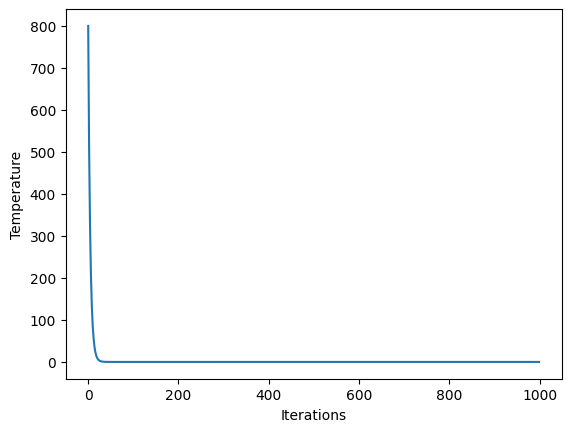

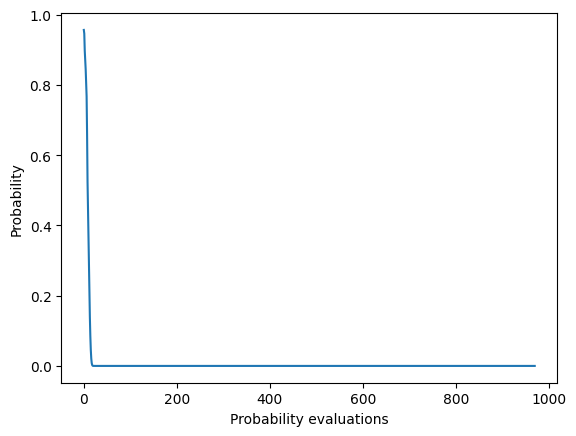

In [124]:
plt.plot(range(iterations), temp_array)
plt.xlabel("Iterations")
plt.ylabel("Temperature")
plt.show()

plt.plot(range(len(probability_array)), probability_array)
plt.xlabel("Probability evaluations")
plt.ylabel("Probability")
plt.show()